In [53]:
# LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [9]:
# PARAMETERS
filepath = 'prepared_data/german.csv'
protectedCatCol = ['sex',]

# protected_Se
# protectedCatCol = 'sex'

In [18]:
# GET DATA
df = pd.read_csv(filepath)

# protectedColIndex_X =df.columns.get_loc(protectedCatCol)
# df['y
df.head()


,month,credit_amount,investment_as_income_percentage,residence_since,age,number_of_credits,people_liable_for,sex,status=A11,status=A12,...,skill_level=A172,skill_level=A173,skill_level=A174,telephone=A191,telephone=A192,foreign_worker=A201,foreign_worker=A202,y_true,y_pred_score,y_pred
0,36.0,8065.0,3.0,2.0,25.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.909454,1.0
1,18.0,3590.0,3.0,3.0,40.0,3.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.229722,0.0
2,36.0,5711.0,4.0,2.0,38.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.027001,0.0
3,21.0,1188.0,2.0,4.0,39.0,1.0,2.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.350666,0.0
4,6.0,662.0,3.0,4.0,41.0,1.0,2.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.489711,0.0


In [19]:
# df['age'].hist(bins=15)

In [20]:

df['y_correct'] = df['y_true'] == df['y_pred']
y_cols = ['y_true','y_pred_score','y_pred','y_correct']
X_df =  df.loc[:, ~df.columns.isin(y_cols)]
# protectedColIndex_X =X_df.columns.get_loc(protectedCatCol
protectedColIndex_X = [X_df.columns.get_loc(c) for c in protectedCatCol if c in X_df]
X = X_df.to_numpy()

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

protected_Sex = df['sex']

age_bins = [0, 25, 35, 45, 55, 65,100]
labels = ['<=25','26-35','36-45','46-55','56-65','66+']
protected_AgeBin = pd.cut(df['age'], bins=age_bins, labels=labels)
protected_AgeVal = df['age']
# pca = PCA(n_components=10,svd_solver='arpack')
# pca.fit(X_scaled)

# plt.plot(pca.explained_variance_ratio_)
# X_pca = pca.transform(X_scaled)

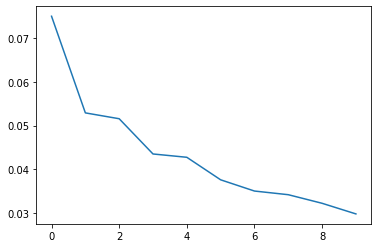

In [21]:
# get first two principle components for graphing purposes
pca = PCA(n_components=10,svd_solver='arpack')
pca.fit(X_scaled)

plt.plot(pca.explained_variance_ratio_)
X_pca = pca.transform(X_scaled)

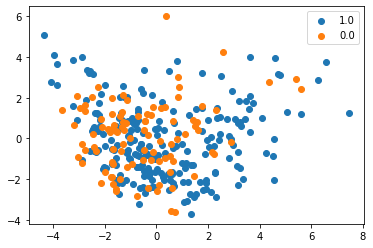

In [22]:
# plot data
fig, ax = plt.subplots()
scatter_x = X_pca[:,0]
scatter_y = X_pca[:,1]
# group = X[:,protectedColIndex_X]
group = protected_Sex
for g in np.flip(np.unique(group)):
    i = np.where(group == g)[0]
    ax.scatter(scatter_x[i], scatter_y[i], label=g)
ax.legend()
plt.show()

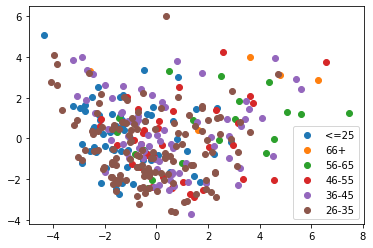

In [23]:
# plot data
fig, ax = plt.subplots()
scatter_x = X_pca[:,0]
scatter_y = X_pca[:,1]
# group = X[:,protectedColIndex_X]
group = protected_AgeBin
for g in np.flip(np.unique(group)):
    i = np.where(group == g)[0]
    ax.scatter(scatter_x[i], scatter_y[i], label=g)
ax.legend()
plt.show()

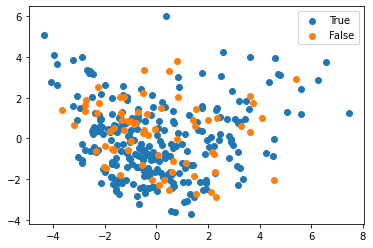

In [24]:
fig, ax = plt.subplots()
# scatter_x = X_pca[:,0]
# scatter_y = X_pca[:,1]
group = df['y_correct']
for g in np.flip(np.unique(group)):
    i = np.where(group == g)[0]
    ax.scatter(scatter_x[i], scatter_y[i], label=g)
ax.legend()
plt.show()

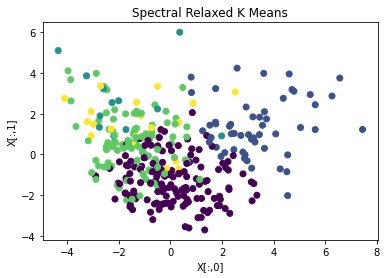

In [26]:
k = 5
kmeans = KMeans(k,random_state=1234).fit(X_scaled)

plt.scatter(scatter_x, scatter_y,c=kmeans.labels_)
plt.title("KMeans")
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

Trial 0: 0.5833333333333334, 12
Trial 1: 0.5, 10
Trial 2: 0.6206896551724138, 29
Trial 3: 0.5833333333333334, 12
Trial 4: 0.6428571428571429, 14
Trial 5: 0.6, 10
Trial 6: 0.6, 15
Trial 7: 0.5714285714285714, 14
Trial 8: 0.4782608695652174, 23
Trial 9: 0.47058823529411764, 17


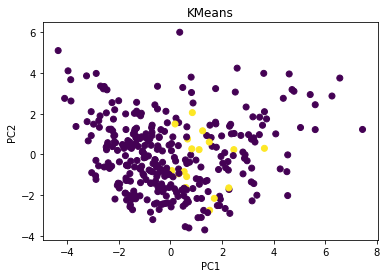

0.47058823529411764


In [123]:
# calculate the accuracy for every cluster:
# accuracy=[None]*k
# # size=[None]*k
# # for i in 
# for i in np.unique(kmeans.labels_):
#     mask = kmeans.labels_ == i
#     cluster_x = X[mask,:]
#     cluster_y_true = df['y_true'][mask]
#     cluster_y_pred = df['y_pred'][mask]
#     # cluster_x = X[mask,:]
#     # print(cluster_x.shape)
#     # print(cluster_y_true.shape)
#     # print(np.unique(cluster_y_pred))
#     accuracy[i] = accuracy_score(cluster_y_true,cluster_y_pred)
# print(accuracy)

# # least accurate cluster
# k_min = accuracy.index(min(accuracy))
# mask = kmeans.labels_ == k_min


def getLeastAccurateCluster(x,y_true,y_pred,k,n_min):
    # print('x shape:',x.shape,'(2)')
    # print('y_true shape:',y_true.shape,'(2)')
    accuracy=[None]*k
    size=[None]*k
    clusters = KMeans(k).fit(x)
    for i in np.unique(clusters.labels_):
        mask = (clusters.labels_ == i)
        # print('mask shape:',mask.shape,i)
        # print('clust size:',sum(mask),i)
        if sum(mask) >= n_min:
            cluster_x = x[mask,:]
            cluster_y_true = y_true[mask]
            cluster_y_pred = y_pred[mask]

            accuracy[i] = accuracy_score(cluster_y_true,cluster_y_pred)
        else:
            accuracy[i] = 1
        size[i]=sum(mask)
    k_min = accuracy.index(min(accuracy))
    mask = clusters.labels_ == k_min
    
    # print('minimum accuracy:',min(accuracy))
    # print(size)
    # print('k_min:',k_min)
    return(mask,min(accuracy))

n_min = 5

def getLeastAccurateCluster_Recursive(x,y_true,y_pred,k,n_min):
    # print('TOP x shape:',x.shape)
    n = x.shape[0]
    indices = list(range(0, n))
    first_mask,first_accuracy = getLeastAccurateCluster(x,y_true,y_pred,k,n_min)

    return_mask = first_mask
    return_accuracy = first_accuracy
    
    if sum(first_mask) > n_min:
        # print('first_mask shape:',first_mask.shape)
        # print('y_true shape:',y_true.shape)
        new_x = x[first_mask,:]
        new_y_true = y_true[first_mask]
        new_y_pred = y_pred[first_mask]
        
        full_i = np.array(list(range(0, n)))
        sub_i = full_i[first_mask]
        
        sub_mask,sub_accuracy = getLeastAccurateCluster_Recursive(new_x,new_y_true,new_y_pred,k,n_min)
        
        if sub_accuracy < return_accuracy:
            return_mask = np.full(n,False)
            for i in sub_i[sub_mask]:
                return_mask[i] = True
            return_accuracy = sub_accuracy
        
        # return(return_mask)
    
    # else: return(newMask)
    return(return_mask,return_accuracy)
    
k=3
n_min = 10
trials = 10
least_mask = np.empty(n)
least_acc = 1.0
for i in range(trials):
    this_mask,this_acc = getLeastAccurateCluster_Recursive(X_scaled,df['y_true'],df['y_pred'],k,n_min)
    print('Trial '+str(i)+': '+str(this_acc)+', '+str(sum(this_mask)))
    if this_acc < least_acc:
        least_mask = this_mask
        least_acc = this_acc

plt.scatter(scatter_x, scatter_y,c=least_mask)
plt.title("KMeans")
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

print(least_acc)


In [128]:
# least_mask
print(sum(least_mask))
print('all sex mean:',df['sex'].mean())
print('least acc mean:',df['sex'][least_mask].mean())

print('all age mean:',df['age'].mean())
print('least acc mean:',df['age'][least_mask].mean())
# print('all sex mean:',X[:,protectedColIndex_X].mean())
# X[:,protectedColIndex_X][least_mask].mean()

17
all sex mean: 0.7
least acc mean: 0.5882352941176471
all age mean: 35.59090909090909
least acc mean: 29.764705882352942


In [130]:
# 1*least_mask

In [180]:
# see what happens if we separate with LDA
# from sklearn.lda import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# lea = np.array([1, 1, 1, 2, 2, 2])
clf = LDA()
clf.fit(X_scaled, (1*least_mask))
clf.coef_[0,:].shape
coef = clf.coef_[0,:]
coef_df = pd.DataFrame()
coef_df['i'] = np.absolute(coef).argsort()[::-1][:10]
coef_df['col'] = X_df.columns[coef_df['i']]
coef_df['val'] = coef[coef_df['i']]



# print(coef[largestCoef])
# print(X_df.columns[largestCoef])
# LDA(n_components=None, priors=None, shrinkage=None, solver='svd',
#   store_covariance=False, tol=0.0001)
# >>> print(clf.predict([[-0.8, -1]]))
coef_df

,i,col,val
0,0,month,1.470582
1,53,skill_level=A174,1.173767
2,3,residence_since,-1.068257
3,12,credit_history=A30,-0.857839
4,54,telephone=A191,-0.821668
5,55,telephone=A192,0.821668
6,52,skill_level=A173,-0.762688
7,32,employment=A71,-0.660405
8,47,housing=A151,0.623254
9,27,savings=A61,0.609732


In [182]:
y_clust_pred = clf.predict(X)
# (1*least_mask)

accuracy_score((1*least_mask),y_clust_pred)

0.8666666666666667

In [67]:
# d = np.random.randint(0,10,(5,3))
# print(d)
# n = np.random.randint(0,10,5)
n = np.array(list(range(0, 5)))
print('n:',n)
m = np.random.randint(0,2,5)
print('m:',m)

# np.where(m==1,d)
mask=(m==1)
# d[mask,:]
n_mask = n[mask]
print('n_mask:',n_mask)

m_mask = np.random.randint(0,2,n_mask.shape[0])
print('m_mask:',m_mask)

new_mask = np.zeros(m.shape[0])
for i in n_mask[m_mask]:
    new_mask[i] = 1
print('new_mask:',new_mask)



n: [0 1 2 3 4]
m: [0 0 0 1 1]
n_mask: [3 4]
m_mask: [1 0]
new_mask: [0. 0. 0. 1. 1.]


In [47]:
df['y_true'].to_numpy()

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [133]:
import sklearn
sklearn.__version__

'1.0'